In [ ]:
import pandas as pd
from urllib.request import urlopen
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
model = BayesianNetwork()


***Bayesian Network***

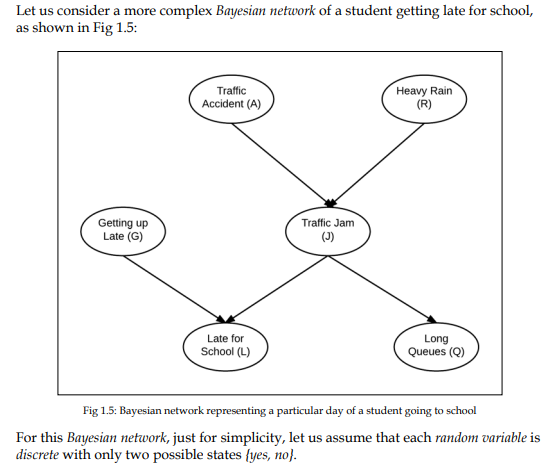

In [ ]:
pip install pgmpy

In [ ]:
model.add_nodes_from(['rain', 'traffic_jam'])
model.add_edge('rain', 'traffic_jam')

In [ ]:
model.add_edge('accident', 'traffic_jam')
model.nodes()
['accident', 'rain', 'traffic_jam']
model.edges()
[('rain', 'traffic_jam'), ('accident', 'traffic_jam')]

[('rain', 'traffic_jam'), ('accident', 'traffic_jam')]

In [ ]:
from pgmpy.factors.discrete.CPD import TabularCPD

cpd_rain = TabularCPD('rain', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])
cpd_traffic_jam = TabularCPD('traffic_jam', 2,
                             [[0.9, 0.6, 0.7, 0.1],
                             [0.1, 0.4, 0.3, 0.9]],
                             evidence=['rain', 'accident'],
                             evidence_card=[2, 2])

In [ ]:
model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam)
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x7f1a7a1a6280>,
 <TabularCPD representing P(accident:2) at 0x7f1a7a1a6250>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x7f1a7a1a6a30>]

In [ ]:
model.add_node('long_queues')
model.add_edge('traffic_jam', 'long_queues')
cpd_long_queues = TabularCPD('long_queues', 2,
                             [[0.9, 0.2],
                             [0.1, 0.8]],
                             evidence=['traffic_jam'],
                             evidence_card=[2])
model.add_cpds(cpd_long_queues)
model.add_nodes_from(['getting_up_late',
                      'late_for_school'])
model.add_edges_from(
    [('getting_up_late', 'late_for_school'),
    ('traffic_jam', 'late_for_school')])
cpd_getting_up_late = TabularCPD('getting_up_late', 2,
    [[0.6], [0.4]])
cpd_late_for_school = TabularCPD(
    'late_for_school', 2,
    [[0.9, 0.45, 0.8, 0.1],
    [0.1, 0.55, 0.2, 0.9]],
    evidence=['getting_up_late','traffic_jam'],evidence_card=[2, 2])
model.add_cpds(cpd_getting_up_late, cpd_late_for_school)
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x7f1a7a1a6280>,
 <TabularCPD representing P(accident:2) at 0x7f1a7a1a6250>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x7f1a7a1a6a30>,
 <TabularCPD representing P(long_queues:2 | traffic_jam:2) at 0x7f19edad7a60>,
 <TabularCPD representing P(getting_up_late:2) at 0x7f19edad7b80>,
 <TabularCPD representing P(late_for_school:2 | getting_up_late:2, traffic_jam:2) at 0x7f19edad7a00>]

In [ ]:
model.check_model()

True

In [ ]:
model.remove_cpds('late_for_school')
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x7f1a7a1a6280>,
 <TabularCPD representing P(accident:2) at 0x7f1a7a1a6250>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x7f1a7a1a6a30>,
 <TabularCPD representing P(long_queues:2 | traffic_jam:2) at 0x7f19edad7a60>,
 <TabularCPD representing P(getting_up_late:2) at 0x7f19edad7b80>]

In [ ]:
model.nodes()

NodeView(('rain', 'traffic_jam', 'accident', 'long_queues', 'getting_up_late', 'late_for_school'))

In [ ]:
model.edges()

OutEdgeView([('rain', 'traffic_jam'), ('traffic_jam', 'long_queues'), ('traffic_jam', 'late_for_school'), ('accident', 'traffic_jam'), ('getting_up_late', 'late_for_school')])

In [ ]:
model.get_independencies()

(long_queues ⟂ getting_up_late)
(long_queues ⟂ getting_up_late | accident)
(long_queues ⟂ getting_up_late | rain)
(long_queues ⟂ getting_up_late, rain, late_for_school, accident | traffic_jam)
(long_queues ⟂ getting_up_late | rain, accident)
(long_queues ⟂ getting_up_late, rain, late_for_school | accident, traffic_jam)
(long_queues ⟂ rain, late_for_school, accident | getting_up_late, traffic_jam)
(long_queues ⟂ getting_up_late, late_for_school, accident | rain, traffic_jam)
(long_queues ⟂ getting_up_late, rain, accident | late_for_school, traffic_jam)
(long_queues ⟂ rain, late_for_school | getting_up_late, accident, traffic_jam)
(long_queues ⟂ getting_up_late, late_for_school | rain, accident, traffic_jam)
(long_queues ⟂ getting_up_late, rain | late_for_school, accident, traffic_jam)
(long_queues ⟂ late_for_school, accident | getting_up_late, rain, traffic_jam)
(long_queues ⟂ rain, accident | getting_up_late, late_for_school, traffic_jam)
(long_queues ⟂ getting_up_late, accident | rain

In [ ]:
import loader
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
#from pgmpy.estimators.HillClimbSearch import BdeuScore, K2Score, BicScore
#from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import PC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install loader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
col_names = pd.read_csv('/content/drive/MyDrive/PGM/WebinarData/names.csv')  # 'data/names.csv'

data = pd.read_csv('/content/drive/MyDrive/PGM/WebinarData/data.csv', names=col_names.columns)
data = data[data["class"] != '?']
data.set_index('id', inplace=True) #stop the model from using id as a node

train, test = train_test_split(data, test_size=0.2, random_state=0)
Y_test = test['class']
test = test.drop(['class'], axis=1)

FileNotFoundError: ignored

In [ ]:
#convert labels to something that can be handled be sklearn's eval functions
labelencoder = LabelEncoder()
#Y_test = labelencoder.fit_transform(Y_test.values.ravel())
Y_test = labelencoder.fit_transform(Y_test)


In [ ]:

### Greedy Structure Learning with Hill Climbing
hc = HillClimbSearch(data)
hc_model = hc.estimate()

### Parameter Learning with Bayesian Estimation
hc_model.fit(train, estimator=BayesianEstimator)
### If the following for loop is un-commented the terminal will be flooded with CPDs
"""
for cpd in best_model.get_cpds():
    print(cpd)
"""

print()



  0%|          | 0/1000000 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
#Notice the significant difference in the connections that this version produces
#Print the final significant edges learned from constraint-based learning
print("The edges learned from constraint-based learning are:")
print(est.estimate(significance_level=0.01).edges())

#Print the hill climber's edges
print("The edges learned from score-based learning (hill climbing) are:")
print(hc_model.edges())

Y_pred_hc = hc_model.predict(test)
Y_pred_cb = cb_model.predict(test)

Y_pred_hc = labelencoder.fit_transform(Y_pred_hc.values.ravel())
Y_pred_cb = labelencoder.fit_transform(Y_pred_cb.values.ravel())

# Output results {'Accuracy': 0.9708029197080292, 'Precision': 0.9423076923076923, 'F1 Score': 0.9607843137254902}
accuracy_hc = accuracy_score(Y_test, Y_pred_hc)
precision_hc = precision_score(Y_test, Y_pred_hc)
f1_hc = f1_score(Y_test, Y_pred_hc)
print("The belief network learned using hill climbing and Bayesian estimation gives us:")
print({"Accuracy": accuracy_hc, "Precision": precision_hc, "F1 Score": f1_hc})

accuracy_cb = accuracy_score(Y_test, Y_pred_cb)
precision_cb = precision_score(Y_test, Y_pred_cb)
f1_cb = f1_score(Y_test, Y_pred_cb)
print("The belief network learned using constraint-based learning and MLE gives us:")
print({"Accuracy": accuracy_cb, "Precision": precision_cb, "F1 Score": f1_cb})